# **Atividade Computacional 04 - TEEC III**
## **Aluno: André Paiva Conrado Rodrigues**

## Importando bibliotecas

Nesta seção do código, são importadas bibliotecas necessárias para o desenvolvimento do código.

In [1]:
import numpy as np
import math
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

In [ ]:
'''
import warnings
warnings.filterwarnings('ignore')
'''

## Forma direta

[84.40179477]

[  1.           8.09212128  32.7412134   83.98447537 143.61903283
 155.70294881  84.40179477]


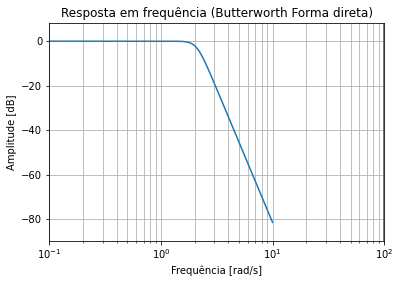

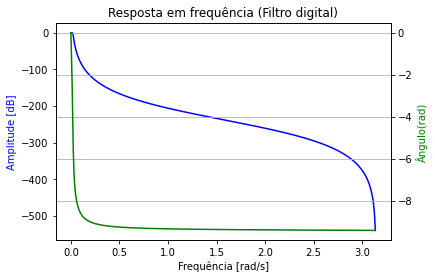

In [2]:
samplerate = 100
b, a = signal.butter(6, 2*np.pi/3, btype='lowpass', analog=True, output='ba')
z, p = signal.bilinear(b, a, fs=samplerate)

print(b)
print()
print(a)

w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Resposta em frequência (Butterworth Forma direta)')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()


w, h = signal.freqz(z, p)
fig, ax1 = plt.subplots()
ax1.set_title('Resposta em frequência (Filtro digital)')
ax1.plot(w, 20.0 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequência [rad/s]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Ângulo(rad)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

## Forma em cascata

[[84.40179477  0.          0.          1.          1.08413868  4.38649084]
 [ 1.          0.          0.          1.          2.96192196  4.38649084]
 [ 1.          0.          0.          1.          4.04606064  4.38649084]]


<ipython-input-3-cd2b71c00fe6>:16: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20.0 * np.log10(abs(h)), 'b')


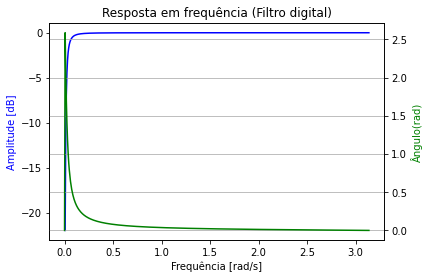

In [3]:
samplerate = 100
sos = signal.butter(6, 2*np.pi/3, btype='lowpass', analog=True, output='sos')
print(sos)
z_sos = []
p_sos = []
i = 0
while i < sos.shape[0]:
    z, p = signal.bilinear(sos[i][0:3], sos[i][3:6], fs=samplerate)
    z_sos.append(z)
    p_sos.append(p)
    i = i + 1
    
w, h = signal.freqz(z, p)
fig, ax1 = plt.subplots()
ax1.set_title('Resposta em frequência (Filtro digital)')
ax1.plot(w, 20.0 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequência [rad/s]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Ângulo(rad)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()